**MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
**PROJECT  -- Quality of Air**

Description: Clean air has a significant positive impact on several SDGs, such as Good Health and
Well-Being, Affordable and Clean Energy and an indirect impact on others. Air pollution can
contribute to global mortality rates as it causes respiratory and cardiovascular diseases 
Solutions to improving air quality, such as switching to affordable and cleaner energy,
cooking, and lowering transport emissions, will also address the climate emergency.
Hence, clean air will help protect these species and maintain healthy ecosystems.

**Insight Deliverable: Identify the air quality at any given point in time based on historical data.**




# **_1. Preprocessing of Dataset_**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data = pd.read_csv('/content/Air_Quality.csv',sep=';')
data=data.drop(data.index[9357:])
data = data.iloc[:,:-2]

data.replace(to_replace=',',value='.',regex=True,inplace=True)
data.replace(-200,np.nan,inplace=True,regex=True)
data
date_data=data.iloc[:1857, 0].unique()


In [ ]:
data_time=data[['Date','Time']]
data_wotime = data[['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']].astype(float)
data_wotime.replace(-200,np.nan,inplace=True,regex=True)
data_wotime.fillna(data_wotime.mean(), inplace=True)

data=pd.concat([data_time,data_wotime],axis=1)



In [ ]:
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S' ).dt.time
data['NOx(GT)']=data['NOx(GT)']-data['NO2(GT)']
dayaverage = data.groupby('Date')[['CO(GT)','NMHC(GT)','NOx(GT)','NO2(GT)']].mean().reset_index()

def calculate_aqi_co(co_concentration):
    breakpoints = [0, 1, 2, 10, 17, 34, 46]
    aqi_values = [0, 50, 100, 200, 300, 400, 500]
    for i in range(1, len(breakpoints)):
        if co_concentration <= breakpoints[i]:
            aqi = ((aqi_values[i] - aqi_values[i - 1]) / (breakpoints[i] - breakpoints[i - 1])) * (co_concentration - breakpoints[i - 1]) + aqi_values[i - 1]
            return int(aqi)
    return 500

def calculate_aqi_no2(no2_concentration):
    breakpoints = [0, 40, 80, 180, 280, 400, 800]
    aqi_values = [0, 50, 100, 200, 300, 400, 500]
    for i in range(1, len(breakpoints)):
        if no2_concentration <= breakpoints[i]:
            aqi = ((aqi_values[i] - aqi_values[i - 1]) / (breakpoints[i] - breakpoints[i - 1])) * (no2_concentration - breakpoints[i - 1]) + aqi_values[i - 1]
            return int(aqi)
    return 500

def calculate_aqi_pm10(Nhmc_concentration):
    breakpoints = [0, 50, 100, 250, 350, 430]
    aqi_values = [0, 50, 100, 200, 300, 400]
    for i in range(1, len(breakpoints)):
        if Nhmc_concentration <= breakpoints[i]:
            aqi = ((aqi_values[i] - aqi_values[i - 1]) / (breakpoints[i] - breakpoints[i - 1])) * (Nhmc_concentration - breakpoints[i - 1]) + aqi_values[i - 1]
            return int(aqi)
    return 500

def calculate_aqi_pm25(nox_concentration):
    breakpoints = [0, 30,60,90,120,250]
    aqi_values = [0, 50, 100, 200, 300, 400]
    for i in range(1, len(breakpoints)):
        if nox_concentration <= breakpoints[i]:
            aqi = ((aqi_values[i] - aqi_values[i - 1]) / (breakpoints[i] - breakpoints[i - 1])) * (nox_concentration - breakpoints[i - 1]) + aqi_values[i - 1]
            return int(aqi)
    return 500


In [ ]:
tempdata=dayaverage[['Date']].copy()
tempdata['AQI_CO'] = dayaverage['CO(GT)'].apply(calculate_aqi_co)
tempdata['AQI_NO2'] = dayaverage['NO2(GT)'].apply(calculate_aqi_no2)
tempdata['AQI_NMHC'] = dayaverage['NMHC(GT)'].apply(calculate_aqi_pm10)
tempdata['AQI_NOx'] = dayaverage['NOx(GT)'].apply(calculate_aqi_pm25)
tempdata['AQI'] = tempdata[['AQI_CO', 'AQI_NO2', 'AQI_NMHC','AQI_NOx']].max(axis=1)
tempdata

,Date,AQI_CO,AQI_NO2,AQI_NMHC,AQI_NOx,AQI
0,2004-03-10,98,128,86,38,128
1,2004-03-11,102,120,103,80,120
2,2004-03-12,109,136,139,112,139
3,2004-03-13,108,138,126,128,138
4,2004-03-14,105,130,111,67,130
...,...,...,...,...,...,...
386,2005-03-31,69,120,179,181,181
387,2005-04-01,57,127,179,90,179
388,2005-04-02,42,120,179,70,179
389,2005-04-03,57,131,179,94,179


In [ ]:
for date in dayaverage['Date']:
    data.loc[data[data['Date'] == date].index,'AQI_CO']= tempdata.loc[tempdata['Date'] == date,'AQI_CO'].values[0]
    data.loc[data[data['Date'] == date].index,'AQI_NO2']= tempdata.loc[tempdata['Date'] == date,'AQI_NO2'].values[0]
    data.loc[data[data['Date'] == date].index,'AQI_NMHC']= tempdata.loc[tempdata['Date'] == date,'AQI_NMHC'].values[0]
    data.loc[data[data['Date'] == date].index,'AQI_NOx']= tempdata.loc[tempdata['Date'] == date,'AQI_NOx'].values[0]
    data.loc[data[data['Date'] == date].index,'AQI']= tempdata.loc[tempdata['Date'] == date,'AQI'].values[0]

data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,AQI_CO,AQI_NO2,AQI_NMHC,AQI_NOx,AQI
0,2004-03-10,18:00:00,2.6,1360.0,150.000000,11.9,1046.0,53.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,98.0,128.0,86.0,38.0,128.0
1,2004-03-10,19:00:00,2.0,1292.0,112.000000,9.4,955.0,11.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,98.0,128.0,86.0,38.0,128.0
2,2004-03-10,20:00:00,2.2,1402.0,88.000000,9.0,939.0,17.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,98.0,128.0,86.0,38.0,128.0
3,2004-03-10,21:00:00,2.2,1376.0,80.000000,9.2,948.0,50.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,98.0,128.0,86.0,38.0,128.0
4,2004-03-10,22:00:00,1.6,1272.0,51.000000,6.5,836.0,15.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,98.0,128.0,86.0,38.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,282.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,101.0,142.0,179.0,316.0,316.0
9353,2005-04-04,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,174.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,101.0,142.0,179.0,316.0,316.0
9354,2005-04-04,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,118.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,101.0,142.0,179.0,316.0,316.0
9355,2005-04-04,13:00:00,2.1,1003.0,218.811816,9.5,961.0,79.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,101.0,142.0,179.0,316.0,316.0


In [ ]:
Color=[]
colourcode=[]
for aqi in data['AQI']:
  if aqi>=0 and aqi<=50:
    Color.append('Green')
    colourcode.append(1)
  elif aqi>=51 and aqi<=100:
    Color.append('Yellow')
    colourcode.append(2)
  elif aqi>=101 and aqi<=150:
    Color.append('Orange')
    colourcode.append(3)
  elif aqi>=151 and aqi<=200:
    Color.append('Red')
    colourcode.append(4)
  elif aqi>=201 and aqi<=300:
    Color.append('Purple')
    colourcode.append(5)
  else:
    Color.append('Maroon')
    colourcode.append(6)

data['AQI Color']=Color
data['Colour Code']=colourcode

#onehot
data['Green']=0
data['Yellow']=0
data['Orange']=0
data['Red']=0
data['Purple']=0
data['Maroon']=0

for d in data.index:
    col_name = data.at[d, 'AQI Color']
    data.at[d, col_name] = 1
data


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,AQI_NOx,AQI,AQI Color,Colour Code,Green,Yellow,Orange,Red,Purple,Maroon
0,2004-03-10,18:00:00,2.6,1360.0,150.000000,11.9,1046.0,53.0,1056.0,113.0,...,38.0,128.0,Orange,3,0,0,1,0,0,0
1,2004-03-10,19:00:00,2.0,1292.0,112.000000,9.4,955.0,11.0,1174.0,92.0,...,38.0,128.0,Orange,3,0,0,1,0,0,0
2,2004-03-10,20:00:00,2.2,1402.0,88.000000,9.0,939.0,17.0,1140.0,114.0,...,38.0,128.0,Orange,3,0,0,1,0,0,0
3,2004-03-10,21:00:00,2.2,1376.0,80.000000,9.2,948.0,50.0,1092.0,122.0,...,38.0,128.0,Orange,3,0,0,1,0,0,0
4,2004-03-10,22:00:00,1.6,1272.0,51.000000,6.5,836.0,15.0,1205.0,116.0,...,38.0,128.0,Orange,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,282.0,539.0,190.0,...,316.0,316.0,Maroon,6,0,0,0,0,0,1
9353,2005-04-04,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,174.0,604.0,179.0,...,316.0,316.0,Maroon,6,0,0,0,0,0,1
9354,2005-04-04,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,118.0,603.0,175.0,...,316.0,316.0,Maroon,6,0,0,0,0,0,1
9355,2005-04-04,13:00:00,2.1,1003.0,218.811816,9.5,961.0,79.0,702.0,156.0,...,316.0,316.0,Maroon,6,0,0,0,0,0,1


# ***2. NaiveBayes***

In [ ]:
import numpy as np

class NaiveBayesClassifier:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = []

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.parameters.append([])

            for col in X_c.T:
                parameters = {'mean': col.mean(), 'std': col.std()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, std, x):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

    def _calculate_class_probabilities(self, row):
        probabilities = []

        for i, c in enumerate(self.classes):
            probability = 1
            for j, params in enumerate(self.parameters[i]):
                mean, std = params['mean'], params['std']
                probability *= self._calculate_likelihood(mean, std, row[j])
            probabilities.append(probability)

        return probabilities

    def predict(self, X):
        predictions = []
        for row in X:
            probabilities = self._calculate_class_probabilities(row)
            prediction = self.classes[np.argmax(probabilities)]
            predictions.append(prediction)
        return predictions


Accuracy: 47.3882606354335


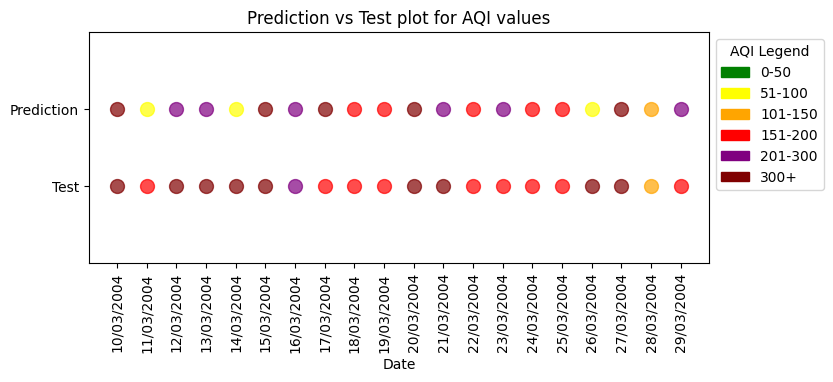

In [ ]:
arr=np.array(data)
m,n=arr.shape
np.random.shuffle(arr)

x=arr[:,(3,5,6,8,10,11,12,13,14)]
y=arr[:,-7]

X_train=x[0:7500,:]
y_train=y[0:7500]
X_test=x[7500:,:]
y_test=y[7500:]
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

predictions = nb_classifier.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)*100

print("Accuracy:", accuracy)
pred=predictions[:20]
y=y_test[:20]
dates=date_data[:20]

fig, ax = plt.subplots(figsize=(8, 3))
Colorpred=[]
Colory=[]
for c in pred:
  if c==1:
    Colorpred.append('Green')
  elif c==2:
    Colorpred.append('Yellow')
  elif c==3:
    Colorpred.append('Orange')
  elif c==4:
    Colorpred.append('Red')
  elif c==5:
    Colorpred.append('Purple')
  else:
    Colorpred.append('Maroon')

for c in y:
  if c==1:
    Colory.append('Green')
  elif c==2:
    Colory.append('Yellow')
  elif c==3:
    Colory.append('Orange')
  elif c==4:
    Colory.append('Red')
  elif c==5:
    Colory.append('Purple')
  else:
    Colory.append('Maroon')

for i, (date, color,c) in enumerate(zip(dates, Colorpred,Colory)):
    sc=ax.scatter(date, i+2-i, color=color, s=100, alpha=0.7)
    ax.scatter(date, i+1-i, color=c, s=100, alpha=0.7)
cs=['Green','Yellow','Orange','Red','Purple','Maroon']
legend_labels = ['0-50', '51-100', '101-150', '151-200', '201-300','300+']
legend_handles = [mpatches.Patch(color=color,label=label) for color, label in zip(cs, legend_labels)]


plt.legend(legend_handles, legend_labels, title='AQI Legend',bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Date')
plt.title('Prediction vs Test plot for AQI values')
plt.ylim(0,3)
plt.xticks(rotation='vertical')
plt.yticks([1, 2], ['Test', 'Prediction'])
plt.show()

# ***3. K-Nearest Neighbour(KNN)***



In [ ]:
#Here we will apply K-Nearest Neighbour model

import scipy.spatial
from collections import Counter
arr=np.array(data)
m,n=arr.shape
np.random.shuffle(arr)

x=arr[:,(3,5,6,8,10,11,12,13,14)]
y=arr[:,-7]

X_train=x[0:7500,:].T
y_train=y[0:7500].T
X_test=x[7500:,:].T
y_test=y[7500:].T
x_train=X_train.reshape(7500,9)
x_test=X_test.reshape((len(x)-len(x_train)),9)

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.x_train = x
        self.y_train = y

    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)

    def predict(self, x_test):
        final_output = []
        for i in range(len(x_test)):
            d = []
            votes = []
            for j in range(len(x_train)):
                dist = scipy.spatial.distance.euclidean(x_train[j] , x_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    def score(self, x_test, y_test,predict):
        # predictions = self.predict(x_test)
        return 100 * (predict == y_test).sum() / len(y_test)

Accuracy in percentage is:  41.30317716747442


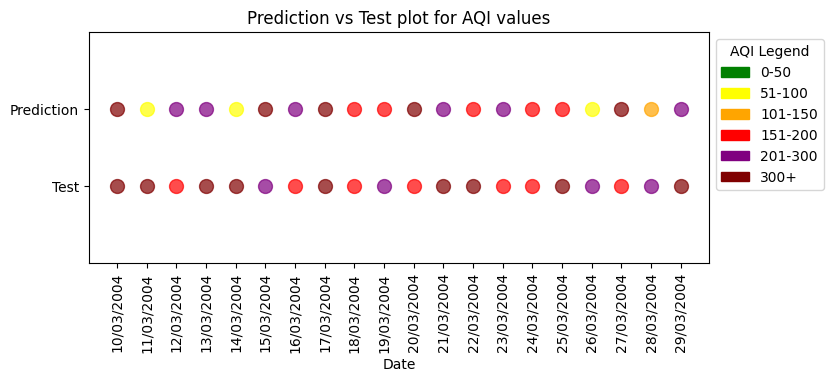

In [ ]:
import matplotlib.pyplot as plt
clf = KNN(7)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
print("Accuracy in percentage is: ", clf.score(x_test, y_test,prediction))

pred=predictions[:20]
y=y_test[:20]
dates=date_data[:20]

fig, ax = plt.subplots(figsize=(8, 3))
Colorpred=[]
Colory=[]
for c in pred:
  if c==1:
    Colorpred.append('Green')
  elif c==2:
    Colorpred.append('Yellow')
  elif c==3:
    Colorpred.append('Orange')
  elif c==4:
    Colorpred.append('Red')
  elif c==5:
    Colorpred.append('Purple')
  else:
    Colorpred.append('Maroon')

for c in y:
  if c==1:
    Colory.append('Green')
  elif c==2:
    Colory.append('Yellow')
  elif c==3:
    Colory.append('Orange')
  elif c==4:
    Colory.append('Red')
  elif c==5:
    Colory.append('Purple')
  else:
    Colory.append('Maroon')

for i, (date, color,c) in enumerate(zip(dates, Colorpred,Colory)):
    sc=ax.scatter(date, i+2-i, color=color, s=100, alpha=0.7)
    ax.scatter(date, i+1-i, color=c, s=100, alpha=0.7)
cs=['Green','Yellow','Orange','Red','Purple','Maroon']
legend_labels = ['0-50', '51-100', '101-150', '151-200', '201-300','300+']
legend_handles = [mpatches.Patch(color=color,label=label) for color, label in zip(cs, legend_labels)]


plt.legend(legend_handles, legend_labels, title='AQI Legend',bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Date')
plt.title('Prediction vs Test plot for AQI values')
plt.ylim(0,3)
plt.xticks(rotation='vertical')
plt.yticks([1, 2], ['Test', 'Prediction'])
plt.show()

# ***4. Random Forest***

Accuracy: 67.84188034188034


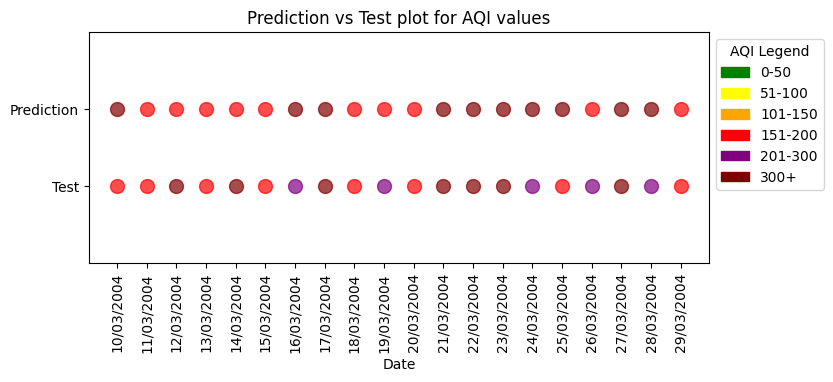

In [ ]:
# Random Forest Model
import numpy as np
import pandas as pd
arr=np.array(data)
m,n=arr.shape
np.random.shuffle(arr)

x=arr[:,(3,5,6,8,10,11,12,13,14)]
y=arr[:,-7]

split_ratio = 0.8
split_index = int(len(x) * split_ratio)

X_train, X_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
# Define a simple Decision Tree Node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # For leaf nodes, the predicted class

# Recursive function to build the decision tree
def build_tree(X, y, depth=0, max_depth=None):
    unique_classes, counts = np.unique(y, return_counts=True)
    dominant_class = unique_classes[np.argmax(counts)]

    # Check if all samples have the same class or max depth is reached
    if len(unique_classes) == 1 or (max_depth is not None and depth == max_depth):
        return Node(value=dominant_class)

    num_features = X.shape[1]
    best_feature = None
    best_threshold = None
    best_gini = float('inf')

    for feature in range(num_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_mask = X[:, feature] <= threshold
            right_mask = ~left_mask

            gini_left = gini_impurity(y[left_mask])
            gini_right = gini_impurity(y[right_mask])

            weighted_gini = (len(y[left_mask]) / len(y)) * gini_left + (len(y[right_mask]) / len(y)) * gini_right

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold

    if best_feature is not None:
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left_subtree = build_tree(X[left_mask], y[left_mask], depth + 1, max_depth)
        right_subtree = build_tree(X[right_mask], y[right_mask], depth + 1, max_depth)

        return Node(feature=best_feature, threshold=best_threshold, left=left_subtree, right=right_subtree)
    else:
        return Node(value=dominant_class)

# Function to calculate Gini impurity
def gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini

# Function to make predictions with the decision tree
def predict_tree(node, X):
    if node.value is not None:
        return node.value

    if X[node.feature] <= node.threshold:
        return predict_tree(node.left, X)
    else:
        return predict_tree(node.right, X)

tree = build_tree(X_train, y_train, max_depth=5)
predictions = [predict_tree(tree, x) for x in X_test]
accuracy = np.sum(predictions == y_test) / len(y_test)*100
print("Accuracy:", accuracy)
pred=predictions[:20]
y=y_test[:20]
dates=date_data[:20]

fig, ax = plt.subplots(figsize=(8, 3))
Colorpred=[]
Colory=[]
for c in pred:
  if c==1:
    Colorpred.append('Green')
  elif c==2:
    Colorpred.append('Yellow')
  elif c==3:
    Colorpred.append('Orange')
  elif c==4:
    Colorpred.append('Red')
  elif c==5:
    Colorpred.append('Purple')
  else:
    Colorpred.append('Maroon')

for c in y:
  if c==1:
    Colory.append('Green')
  elif c==2:
    Colory.append('Yellow')
  elif c==3:
    Colory.append('Orange')
  elif c==4:
    Colory.append('Red')
  elif c==5:
    Colory.append('Purple')
  else:
    Colory.append('Maroon')

for i, (date, color,c) in enumerate(zip(dates, Colorpred,Colory)):
    sc=ax.scatter(date, i+2-i, color=color, s=100, alpha=0.7)
    ax.scatter(date, i+1-i, color=c, s=100, alpha=0.7)
cs=['Green','Yellow','Orange','Red','Purple','Maroon']
legend_labels = ['0-50', '51-100', '101-150', '151-200', '201-300','300+']
legend_handles = [mpatches.Patch(color=color,label=label) for color, label in zip(cs, legend_labels)]


plt.legend(legend_handles, legend_labels, title='AQI Legend',bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Date')
plt.title('Prediction vs Test plot for AQI values')
plt.ylim(0,3)
plt.xticks(rotation='vertical')
plt.yticks([1, 2], ['Test', 'Prediction'])
plt.show()

# ***5. Artificial Neural Network (ANN)***

In [ ]:
#We will impliment an Artificial Neural Network: an input layer, two hidden layers, and an output layer is used.
#preprocessing:

arr=np.array(data)
m,n=arr.shape
np.random.shuffle(arr) #to avoid similar typing in training or test sets


x = arr[:, (3, 5, 6, 8, 10, 11, 12, 13, 14)].astype(float)
y = arr[:, -6:]


x_train=x[0:7500,:]
y_train=y[0:7500]
x_test=x[7500:,:]
y_test=y[7500:]



In [ ]:
#Dense layer class, for modularity as used in modules such as Keras:
#For clarity, output_gradient=delE/delY, weights_gradient=delE/delW, input_gradient=delE/delX

class Dense():
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

#delE/delY not directly calculated due to the unavailability of the activation function used. This makes the example usable in any case.

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.mean(output_gradient, axis=1, keepdims=True)
        return input_gradient

In [ ]:
#We treat the activ. func. as a layer, with fprop: Y=f(x)

class Activation():
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [ ]:
#The activation functions used:

class ActivationBase():
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))


class ReLU(ActivationBase):
    def __init__(self):
        def ReLU(x):
            return np.maximum(0,x).astype(float)

        def ReLU_prime(x):
            return np.where(x > 0, 1, 0).astype(float)
        super().__init__(ReLU, ReLU_prime)

class Tanh(ActivationBase):
    def __init__(self):
        def tan_h(x):
            return np.tanh(x.astype(float))

        def tan_h_prime(x):
            return 1 - np.tanh(x.astype(float)) ** 2

        super().__init__(tan_h, tan_h_prime)
class Softmax():
    def forward(self, input):
        tmp = np.exp(input.astype(float))
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_gradient, learning_rate):
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.astype(float).T) * self.output.astype(float), output_gradient.astype(float))

In [ ]:
#Categorical crossentropy loss is used here:

def categorical_cross_entropy(y_true, y_pred):
    # Avoiding numerical instability with clip and log
    eps = 1e-10
    y_pred = np.clip(y_pred, eps, 1 - eps) #clamps value between 10^-10 and 1-10^-10 so value isnt 0 or 1 to cause errors
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

def categorical_cross_entropy_prime(y_true, y_pred):
    eps = 1e-10
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y_true / y_pred) / len(y_true)

In [ ]:
x_train=np.reshape(x_train,(7500,9,1))
y_train=np.reshape((y_train),(7500,6,1))
x_test=np.reshape(x_test,(1857,9,1))
y_test=np.reshape((y_test),(1857,6,1))

network = [
    Dense(9, 12),
    ReLU(),
    Dense(12, 12),
    ReLU(),
    Dense(12, 6),
    Softmax()
]

In [ ]:
def train(network, loss, loss_prime, x_train, y_train, epochs = 100, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = x
            for layer in network:
              output=layer.forward(output)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)
        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")
        #     # print(output)

In [ ]:
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

In [ ]:
train(network, categorical_cross_entropy, categorical_cross_entropy_prime, x_train, y_train, epochs=250, learning_rate=0.01)

1/250, error=0.2169779396964347
2/250, error=0.13608444042877643
3/250, error=0.12447025600414485
4/250, error=0.11848915341566818
5/250, error=0.11452614340587104
6/250, error=0.11154831076247958
7/250, error=0.10943622630087195
8/250, error=0.10781175683833422
9/250, error=0.10644535662194649
10/250, error=0.10519584935444157
11/250, error=0.10415950721980505
12/250, error=0.10333722163311805
13/250, error=0.10258901766381578
14/250, error=0.10205131936294265
15/250, error=0.10147121731528397
16/250, error=0.10097680132467594
17/250, error=0.10044905466487235
18/250, error=0.10006247391685424
19/250, error=0.09965908843700491
20/250, error=0.09924571608045882
21/250, error=0.09890169095907668
22/250, error=0.09855035694211405
23/250, error=0.09812849922309194
24/250, error=0.09776984030383491
25/250, error=0.09744063342072623
26/250, error=0.0972061917988732
27/250, error=0.09695306285566532
28/250, error=0.09672584989031428
29/250, error=0.09652293324479665
30/250, error=0.096389424

KeyboardInterrupt: ignored

In [ ]:
# Forward pass on test data
predictions = []
for x in x_test:
    output = x
    for layer in network:
        output = layer.forward(output)
    # Apply softmax to get probabilities and find the class with the highest probability
    predicted_class = np.argmax(output)
    predictions.append(predicted_class)

# Convert one-hot encoded y_test back to class labels
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predictions == true_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 38.84%


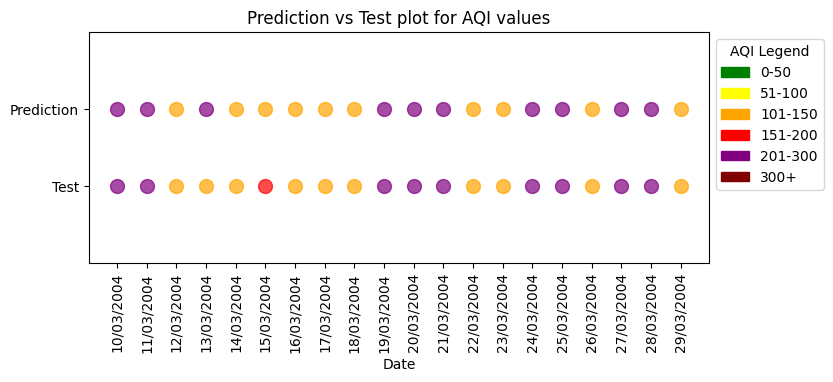

In [ ]:
pred=predictions[:20]
y=true_classes[:20]
dates=date_data[:20]

fig, ax = plt.subplots(figsize=(8, 3))
Colorpred=[]
Colory=[]
for c in pred:
  if c==1:
    Colorpred.append('Green')
  elif c==2:
    Colorpred.append('Yellow')
  elif c==3:
    Colorpred.append('Orange')
  elif c==4:
    Colorpred.append('Red')
  elif c==5:
    Colorpred.append('Purple')
  else:
    Colorpred.append('Maroon')

for c in y:
  if c==1:
    Colory.append('Green')
  elif c==2:
    Colory.append('Yellow')
  elif c==3:
    Colory.append('Orange')
  elif c==4:
    Colory.append('Red')
  elif c==5:
    Colory.append('Purple')
  else:
    Colory.append('Maroon')

for i, (date, color,c) in enumerate(zip(dates, Colorpred,Colory)):
    sc=ax.scatter(date, i+2-i, color=color, s=100, alpha=0.7)
    ax.scatter(date, i+1-i, color=c, s=100, alpha=0.7)
cs=['Green','Yellow','Orange','Red','Purple','Maroon']
legend_labels = ['0-50', '51-100', '101-150', '151-200', '201-300','300+']
legend_handles = [mpatches.Patch(color=color,label=label) for color, label in zip(cs, legend_labels)]


plt.legend(legend_handles, legend_labels, title='AQI Legend',bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Date')
plt.title('Prediction vs Test plot for AQI values')
plt.ylim(0,3)
plt.xticks(rotation='vertical')
plt.yticks([1, 2], ['Test', 'Prediction'])
plt.show()

# ***6. Comparison of insights drawn from the models***
Random Forest gives the best accuracy(67.8%) in 3 min.
Naive Bayes has 47.3% accuracy but gives that in least time <30sec.
ANN is the worst in 250 epochs with 38.84% accuracy in 7min but we conclude that with enough epochs it will give a much better result

# **_7. References_**

1.   https://www.researchgate.net/publication/5847739_Introduction_to_artificial_neural_networks
2.